## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

## Read the data 

In [2]:
Data = pd.read_csv('data/creditcard.csv')

In [3]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Drop the variable we do not need

In [5]:
#Drop Time
dataset = Data.drop(['Time'],axis=1)

In [6]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

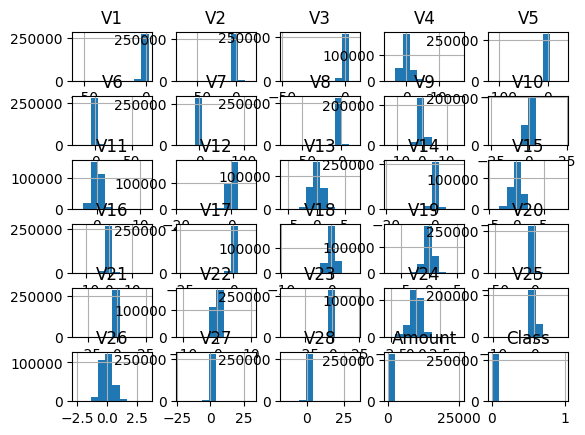

In [7]:
dataset.hist()

## Plot Correlation chart

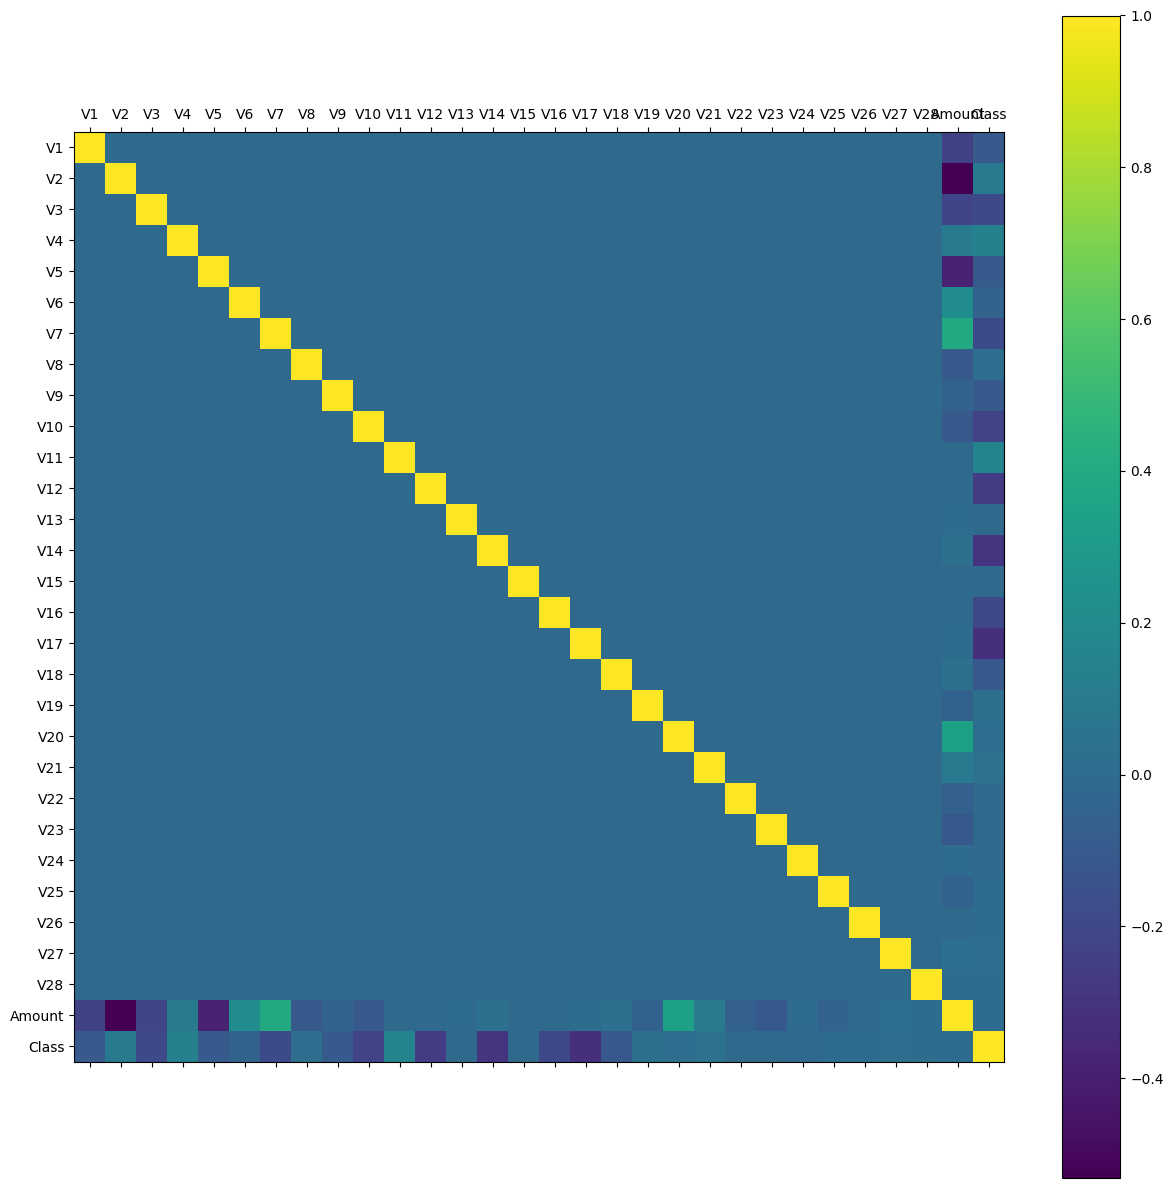

In [8]:
rcParams['figure.figsize'] = 10,15  #10 15
rcParams["figure.dpi"]= 100
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

## Know the classes or levels of the variable (Transaction)

In [9]:
dataset['Class'].unique()

array([0, 1])

## Get the count of the classes or levels

In [30]:
import os
import plotly.graph_objects as go
# Ensure the folder exists
os.makedirs("visualization", exist_ok=True)
# Extract counts
classes = dataset['Class'].unique()
counts = dataset['Class'].value_counts().loc[classes].values

fig = go.Figure(
    data=[
        go.Bar(
            x=classes,
            y=counts,
            marker=dict(color=['red', 'green'])
        )])
fig.update_layout(
    title="Count of each Target Class",
    xaxis_title="Target Classes",
    yaxis_title="Count",
    width=800,
    height=500
)
fig.write_html(os.path.join("visualization", "class_counts.html"))


### Split the Data to X and Y and Train and testing

In [11]:
y = dataset['Class']
X = dataset.drop(['Class'], axis = 1)
#Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

###  dataset has 492 frauds out of 284,807 transactions, so frauds are about 0.172% of the data. With a random 80/20 split, the test set will have roughly 0.2×492≈98 frauds

In [12]:
#Isolation Forest
#Key Concept: Anomalies require fewer splits to isolate.
from sklearn.ensemble import IsolationForest

contamination = y.sum() / len(y)  
iso_forest = IsolationForest(
    n_estimators=100,          
    max_samples='auto',         
    contamination=contamination, # Critical parameter!
    random_state=42,
    n_jobs=-1                   # Use all cores
)
iso_forest.fit(X_train)
iso_scores_test = iso_forest.score_samples(X_test)  # Negative = anomaly
iso_preds_test = iso_forest.predict(X_test)  # -1=anomaly, 1=normal
iso_binary = (iso_preds_test == -1).astype(int)
print(f"Anomalies detected: {(iso_binary == 1).sum()}")

Anomalies detected: 106


In [ ]:
# 3.2 Local Outlier Factor (LOF)
#Key Concept: Anomalies have lower density than neighbors.
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(
    n_neighbors=20,              
    contamination=contamination,
    novelty=True,                
    n_jobs=-1
)
lof_model.fit(X_train)
lof_scores_test = lof_model.score_samples(X_test)
lof_preds_test = lof_model.predict(X_test)
lof_binary = (lof_preds_test == -1).astype(int)

print(f"Anomalies detected: {(lof_binary == 1).sum()}")

c:\Users\Zyad Diab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names

c:\Users\Zyad Diab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



Anomalies detected: 97


In [14]:
X_train_normal = X_train[y_train == 0]
# just to check the training set for AE
# there are 284,807 normal transactions, 284,315 normal and 492 fraud
# so 0.8×284,315≈227,452
print(f"Normal transactions for AE training: {len(X_train_normal)}")

Normal transactions for AE training: 227454


In [15]:
#Autoencoder
#key concept: Train on normal data; anomalies have high reconstruction error.
import tensorflow as tf
from tensorflow.keras import layers, models
# Architecture: Compression -> Bottleneck -> Decompression
input_dim = X_train.shape[1]  # 29 features
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu', name='encoder1'),
    layers.Dense(16, activation='relu', name='encoder2'),
    layers.Dense(8, activation='relu', name='bottleneck'),  # Compress
    layers.Dense(16, activation='relu', name='decoder1'),
    layers.Dense(32, activation='relu', name='decoder2'),
    layers.Dense(input_dim, activation='linear', name='output')
])
autoencoder.compile(
    optimizer='adam',
    loss='mse'  # Reconstruction loss
)
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=10,
    batch_size=256,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)
print(autoencoder.summary())

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 834.4882 - val_loss: 0.9931
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9307 - val_loss: 0.6320
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8224 - val_loss: 0.7183
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7132 - val_loss: 1.1751
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4881 - val_loss: 0.7882
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8030 - val_loss: 0.6029
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5919 - val_loss: 26.0984
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.1022 - val_loss: 0.5791
Epoch 9/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5665 - val_loss: 0.5718
Epoch 10/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9520 - val_loss: 0.4840


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder1 (Dense)                │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder1 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder2 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,809 (38.32 KB)

 Trainable params: 3,269 (12.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,540 (25.55 KB)

None


Reconstruction Error Statistics:
  Mean: 0.529698
  Median: 0.300821
the mean is larger than the median because a few extreme outliers 
(very badly reconstructed points) pull the average up
--------------------------------------------------
  Std: 4.440168
The standard deviation is large compared to the mean because
 of those rare points with very high error
--------------------------------------------------
  95th percentile: 1.047890
95% of the test transactions have reconstruction error ≤ 1.09,
 and 5% have higher error


C:\Users\Zyad Diab\AppData\Local\Temp\ipykernel_22308\2586707662.py:33: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



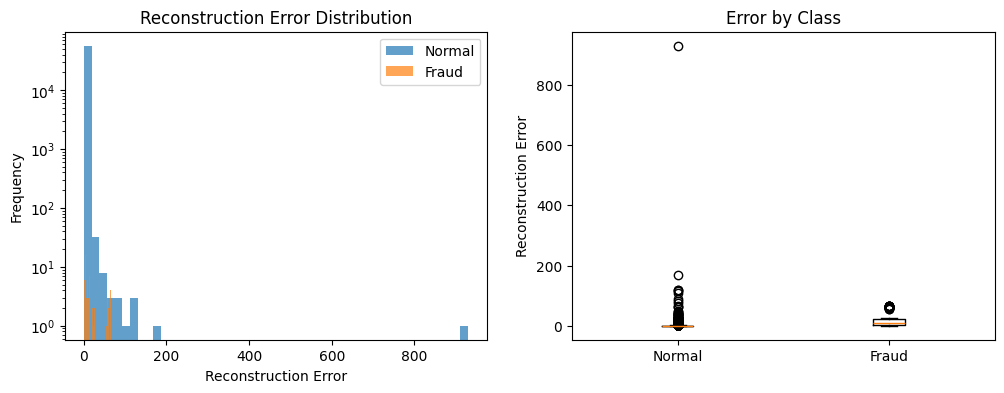

In [ ]:
from matplotlib import pyplot as plt
X_test_pred = autoencoder.predict(X_test, verbose=0)
# Calculate Mean Squared Error for each sample
reconstruction_error = np.mean((X_test - X_test_pred) ** 2, axis=1)

print(f"Reconstruction Error Statistics:")
print(f"  Mean: {reconstruction_error.mean():.6f}")
print(f"  Median: {np.median(reconstruction_error):.6f}")
print(f"the mean is larger than the median because a few extreme outliers \n(very badly reconstructed points) pull the average up")
print("-"*50)
print(f"  Std: {reconstruction_error.std():.6f}")
print(f"The standard deviation is large compared to the mean because\n of those rare points with very high error")
print("-"*50)
#percentile is just a threshold not an accuracy
print(f"  95th percentile: {np.percentile(reconstruction_error, 95):.6f}")
print(f"95% of the test transactions have reconstruction error ≤ 1.09,\n and 5% have higher error")

# Visualize
plt.figure(figsize=(12, 4))

# Histogram by class
plt.subplot(1, 2, 1)
plt.hist(reconstruction_error[y_test == 0], bins=50, alpha=0.7, label='Normal')
plt.hist(reconstruction_error[y_test == 1], bins=50, alpha=0.7, label='Fraud')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.yscale('log')  # Log scale for visibility

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot([reconstruction_error[y_test == 0], reconstruction_error[y_test == 1]],
            labels=['Normal', 'Fraud'])
plt.ylabel('Reconstruction Error')
plt.title('Error by Class')
plt.show()

In [17]:
# Strategy 1: Percentile-based (most common)
threshold_p95 = np.percentile(reconstruction_error, 95)
threshold_p99 = np.percentile(reconstruction_error, 99)

# Strategy 2: Statistical (mean + k*std)
threshold_mean = reconstruction_error.mean() + 3 * reconstruction_error.std()

# Strategy 3: ROC-based (optimize for specific metric)
#here we use true labels to find the optimal threshold
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
j_scores = tpr - fpr  # Youden's J statistic
optimal_idx = np.argmax(j_scores)
threshold_optimal = thresholds[optimal_idx]

# Use 95th percentile (balance between recall and precision)
ae_threshold = threshold_p95
ae_preds = (reconstruction_error > ae_threshold).astype(int)

print(f"Thresholds:")
print(f"  95th percentile: {threshold_p95:.6f}")
print(f"  99th percentile: {threshold_p99:.6f}")
print(f"  Mean + 3*std: {threshold_mean:.6f}")
print(f"  ROC-optimal: {threshold_optimal:.6f}")
print(f"\nUsing: {ae_threshold:.6f}")

Thresholds:
  95th percentile: 1.047890
  99th percentile: 3.099141
  Mean + 3*std: 13.850201
  ROC-optimal: 0.944098

Using: 1.047890


In [18]:
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    roc_auc_score, precision_recall_curve, auc
)

def evaluate_model(y_true, y_pred, model_name):
    """Comprehensive model evaluation"""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(classification_report(y_true, y_pred, target_names=['Normal', 'Fraud']))
    
    # Calculate custom metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nConfusion Matrix:")
    print(f"  True Negatives: {tn}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    print(f"  True Positives: {tp}")
    print(f"\nMetrics:")
    print(f"  Precision: {precision:.4f} (false alarm rate)")
    print(f"  Recall: {recall:.4f} (catch rate)")
    print(f"  Specificity: {specificity:.4f} (true negative rate)")
    print(f"  F1-Score: {f1:.4f}")
    
    return {
        'precision': precision, 'recall': recall, 
        'f1': f1, 'specificity': specificity
    }

# Evaluate all models
iso_results = evaluate_model(y_test, iso_binary, "Isolation Forest")
lof_results = evaluate_model(y_test, lof_binary, "Local Outlier Factor")
ae_results = evaluate_model(y_test, ae_preds, "Autoencoder")


Isolation Forest
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56861
       Fraud       0.20      0.21      0.20       101

    accuracy                           1.00     56962
   macro avg       0.60      0.60      0.60     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
  True Negatives: 56776
  False Positives: 85
  False Negatives: 80
  True Positives: 21

Metrics:
  Precision: 0.1981 (false alarm rate)
  Recall: 0.2079 (catch rate)
  Specificity: 0.9985 (true negative rate)
  F1-Score: 0.2029

Local Outlier Factor
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56861
       Fraud       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
  True Negatives: 56764
  False Positi

## So In conclusion
##### for **Isolation Forest**:it rarely flags fraud correctly (low recall), but doesn’t make many mistakes on normal transaction so its Good for avoiding false alarms, but bad at actually catching fraud
##### for **LOF**:it completely failed to detect fraud on this dataset and shouldnt be used at all
#### for **AutoEncoder**:it catches most of the frauds (high recall),But it also flags many normal transactions as fraud (low precision)




In [19]:
iso_roc_auc = roc_auc_score(y_test, iso_scores_test)
lof_roc_auc = roc_auc_score(y_test, lof_scores_test)
ae_roc_auc = roc_auc_score(y_test, reconstruction_error)

# Precision-Recall AUC: Focus on minority class (better for imbalanced)
iso_precision, iso_recall, _ = precision_recall_curve(y_test, iso_scores_test)
iso_pr_auc = auc(iso_recall, iso_precision)

lof_precision, lof_recall, _ = precision_recall_curve(y_test, lof_scores_test)
lof_pr_auc = auc(lof_recall, lof_precision)

ae_precision, ae_recall, _ = precision_recall_curve(y_test, reconstruction_error)
ae_pr_auc = auc(ae_recall, ae_precision)

print(f"\n{'='*60}")
print("Area Under Curve Scores")
print(f"{'='*60}")
print(f"{'Model':<20} {'ROC-AUC':<12} {'PR-AUC':<12}")
print(f"{'-'*44}")
print(f"{'Isolation Forest':<20} {iso_roc_auc:<12.4f} {iso_pr_auc:<12.4f}")
print(f"{'LOF':<20} {lof_roc_auc:<12.4f} {lof_pr_auc:<12.4f}")
print(f"{'Autoencoder':<20} {ae_roc_auc:<12.4f} {ae_pr_auc:<12.4f}")


Area Under Curve Scores
Model                ROC-AUC      PR-AUC      
--------------------------------------------
Isolation Forest     0.0437       0.0009      
LOF                  0.3309       0.0012      
Autoencoder          0.9531       0.2552      


## Train One tree

In [20]:
Hyper_paramters={
    'criterion':['entropy'],
    'max_depth':[4]
    }
#Define the five fold Cross Validation
Tree_Gridsearch_paramters=GridSearchCV(DecisionTreeClassifier(),
                                       Hyper_paramters,
                                       scoring='roc_auc',
                                       n_jobs=-1,
                                       cv=5,verbose=2
                                       )
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)

print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  
Final_Model=Tree_crossvalidation.best_estimator_
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_) 
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances
#Tree_crossvalidation.cv_results_  #gets summary of results
#Print all importance
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))
    

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 4}
The best AUC score was 
0.9415850178105316
('V1', array([0.]))
('V2', array([0.]))
('V3', array([0.]))
('V4', array([0.02073626]))
('V5', array([0.]))
('V6', array([0.]))
('V7', array([0.]))
('V8', array([0.]))
('V9', array([0.]))
('V10', array([0.05680758]))
('V11', array([0.]))
('V12', array([0.]))
('V13', array([0.]))
('V14', array([0.14411129]))
('V15', array([0.]))
('V16', array([0.00747344]))
('V17', array([0.75232589]))
('V18', array([0.]))
('V19', array([0.]))
('V20', array([0.01072125]))
('V21', array([0.00364485]))
('V22', array([0.]))
('V23', array([0.00417945]))
('V24', array([0.]))
('V25', array([0.]))
('V26', array([0.]))
('V27', array([0.]))
('V28', array([0.]))
('Amount', array([0.]))


## Train the Bagging Model

In [21]:
Hyper_paramters={
    'n_estimators':[3,4,5,6] 
    }

Tree_Gridsearch_paramters=GridSearchCV(BaggingClassifier(),
                                       Hyper_paramters,
                                       scoring='roc_auc',
                                       n_jobs=-1,
                                       cv=5,
                                       verbose=2
                                       )
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)

# Print the best hyper parameters combination for the best model
print("The best parameter combination is:")
print(Tree_crossvalidation.best_params_)
Final_Model = Tree_crossvalidation.best_estimator_
print("The best AUC score was:")
print(Tree_crossvalidation.best_score_)

# Extract feature importances from bagging estimators
importances = np.mean([
    estimator.feature_importances_ 
    for estimator in Final_Model.estimators_
], axis=0)

# Print all importance
Names = list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print(f"{Names[f]}: {importances[f]:.4f}")
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best parameter combination is:
{'n_estimators': 5}
The best AUC score was:
0.9153799864309387
V1: 0.0131
V2: 0.0033
V3: 0.0075
V4: 0.0229
V5: 0.0055
V6: 0.0080
V7: 0.0080
V8: 0.0038
V9: 0.0016
V10: 0.0726
V11: 0.0110
V12: 0.0250
V13: 0.0068
V14: 0.0982
V15: 0.0213
V16: 0.0105
V17: 0.5437
V18: 0.0054
V19: 0.0139
V20: 0.0055
V21: 0.0175
V22: 0.0091
V23: 0.0045
V24: 0.0038
V25: 0.0091
V26: 0.0333
V27: 0.0238
V28: 0.0049
Amount: 0.0066


### Train the Random Forst Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
Hyper_paramters={
    'criterion':['entropy'],
    'max_depth':[4,10],
    'n_estimators':[50, 100], 
    'max_features':['sqrt'] 
    }

Tree_Gridsearch_paramters=GridSearchCV(RandomForestClassifier(),
                                       Hyper_paramters,
                                       scoring='roc_auc',
                                       n_jobs=-1,
                                       cv=5,
                                       verbose=2
                                       )
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)

print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  
Final_Model=Tree_crossvalidation.best_estimator_
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances

Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
The best AUC score was 
0.9780816867070872
('V1', array([0.00788403]))
('V2', array([0.00655812]))
('V3', array([0.03882655]))
('V4', array([0.04797588]))
('V5', array([0.010246]))
('V6', array([0.00991879]))
('V7', array([0.01918224]))
('V8', array([0.00992743]))
('V9', array([0.01471818]))
('V10', array([0.10635034]))
('V11', array([0.08702842]))
('V12', array([0.1287672]))
('V13', array([0.00617746]))
('V14', array([0.1474731]))
('V15', array([0.00562141]))
('V16', array([0.0554552]))
('V17', array([0.17791809]))
('V18', array([0.02378414]))
('V19', array([0.01152988]))
('V20', array([0.01008536]))
('V21', array([0.01646892]))
('V22', array([0.00542787]))
('V23', array([0.00499313]))
('V24', array([0.00440915]))
('V25', array([0.00439309]))
('V26', array([0.01054977]))
('V27', array([0.00973336]))
('V28',

# Predict using the best model (The last model trained)

In [23]:
#Prediction Using the Model
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Safe", "Fraud"]))

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


[[56855     6]
 [   20    81]]
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00     56861
       Fraud       0.93      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy :  0.9995435553526912
Sensitivity :  0.9998944795202336
Specificity :  0.801980198019802


## Plot a confusion Matrix

In [ ]:
import os
import numpy as np
import plotly.graph_objects as go
# Ensure the folder exists
os.makedirs("visualization", exist_ok=True)
def plot_confusion_matrix_plotly(cm, target_names, title="Confusion Matrix",
                                 normalize=False, colorscale="Blues",
                                 filename="confusion_matrix.html", save=True):
    cm = np.array(cm)
    # Normalize
    if normalize:
        cm_display = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm_display = cm
    # Flip matrix vertically (to match common ML layout)
    cm_display = np.flipud(cm_display)
    # Also flip label order on Y-axis
    target_names_flipped = list(reversed(target_names))
    # Accuracy / misclass
    accuracy = np.trace(cm) / np.sum(cm)
    misclass = 1 - accuracy
    # Text annotations
    if normalize:
        text = [[f"{v:.4f}" for v in row] for row in cm_display]
    else:
        text = [[f"{int(v)}" for v in row] for row in cm_display]
    # Plotly heatmap
    fig = go.Figure(
        data=go.Heatmap(
            z=cm_display,
            x=target_names,
            y=target_names_flipped,
            colorscale=colorscale,
            showscale=True,
            text=text,
            texttemplate="%{text}",
            textfont={"size": 20},
            hovertemplate="Predicted: %{x}<br>True: %{y}<br>Value: %{z}<extra></extra>"
        ))
    fig.update_layout(
        title=f"{title}<br>Accuracy={accuracy:.4f}, Misclass={misclass:.4f}",
        xaxis_title="Predicted Label",
        yaxis_title="True Label",
        width=800,
        height=800
    )
    fig.update_xaxes(side="top")
    if save:
        path = os.path.join("visualization", filename)
        fig.write_html(path)
        print(f"Confusion matrix saved to {path}")
# ---- USAGE EXAMPLE ----
plot_confusion_matrix_plotly(
    cm1,
    ["Safe", "Fraud"],
    title="Confusion Matrix",
    normalize=False,
    filename="cm_safe_fraud.html"
)

Confusion matrix saved to visualization\cm_safe_fraud.html


# Plot ROC Curve

C:\Users\Zyad Diab\AppData\Local\Temp\ipykernel_22308\3736574884.py:5: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



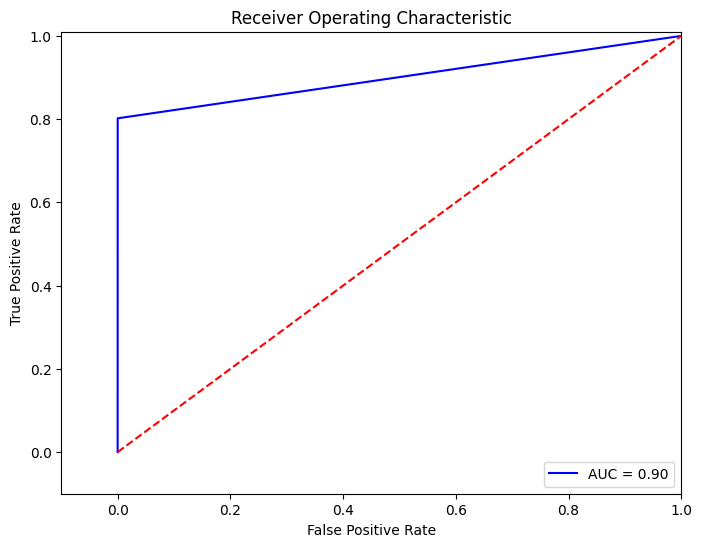

In [28]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

plt.rcParams.update({'font.size': 10})

fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.figure(figsize=(8,6))  # Example: 10x8 inches
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()
